In [1]:
import os

In [2]:
files=os.listdir('train/')

In [3]:
len(files)

25000

<h2> Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,BatchNormalization
from PIL import Image , ImageFilter
import matplotlib.pyplot as plt


<h2> Creating data sets

In [5]:
x = []
y = []



<b> Image augmentation

Original image


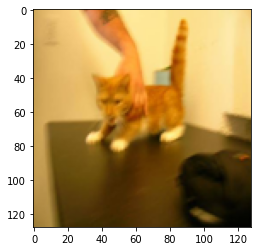

rotated 90 image 


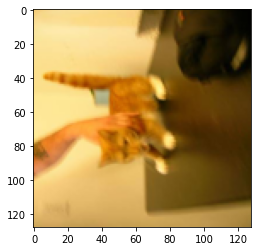

noise image 


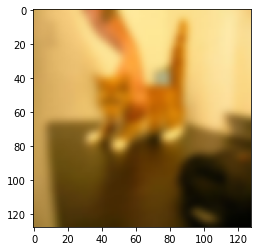

In [6]:
#image augmentation
image = Image.open('train/'+files[0])
image=image.resize((128,128))
print("Original image")
plt.imshow(image)
plt.show()

rot =image.transpose(Image.ROTATE_90)
print("rotated 90 image ")
plt.imshow(rot)
plt.show()

noised = image.filter(ImageFilter.GaussianBlur(2))
print("noise image ")
plt.imshow(noised)
plt.show()

In [7]:
for i in range(len(files)):
    #image augmentation
    image = Image.open('train/'+files[i])
    image=image.resize((128,128))
    
    rot90 =image.transpose(Image.ROTATE_90)
    rot180 =rot90.transpose(Image.ROTATE_90)
    rot270 =rot180.transpose(Image.ROTATE_90)
    
    noised = image.filter(ImageFilter.GaussianBlur(2))
    
    x.append(np.asarray(image))
    x.append(np.asarray(rot90))
    x.append(np.asarray(rot180))
    x.append(np.asarray(rot270))
    x.append(np.asarray(noised))
    
    z=files[i].split('.')
    v=0
    if(z[0]=='cat'):
        v=0    
    else:
        v=1
    #appending expected output    
    for i in range(5):    
        y.append(v)
    

In [8]:
x=np.array(x)
y = np.array(y)

In [9]:
print(x.shape)
print(y.shape)

(125000, 128, 128, 3)
(125000,)


<h4> Spliting train and test data

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
train_size=0.75,
test_size=0.25,
random_state=42)

<h3> Model for Prediction

In [12]:
def catdogmod():
    mode = Sequential()
    mode.add(Conv2D(64,(3,3),activation ='relu',input_shape=(128,128,3)))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))
    mode.add(Dropout(0.25))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))
    mode.add(Dropout(0.25))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))


    mode.add(Flatten())
    mode.add(Dense(32,activation='relu'))
    mode.add(Dense(1,activation='sigmoid'))
    return mode

In [13]:
model = catdogmod()

In [14]:
import tensorflow as tf
checkpoint_path = "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [15]:
model.compile(loss="binary_crossentropy", 
             optimizer='adam',
             metrics=["accuracy"])

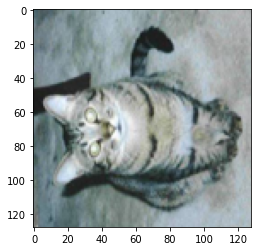

0


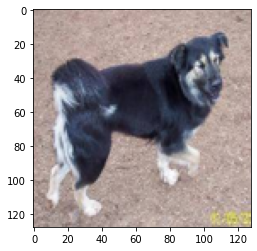

1


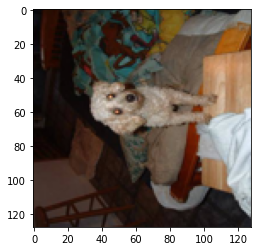

1


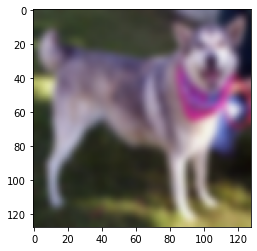

1


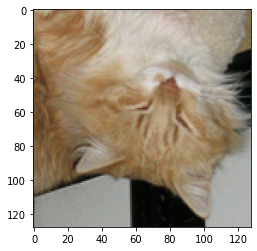

0


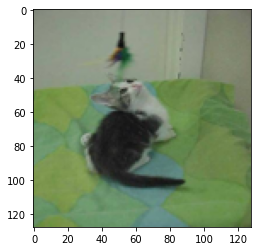

0


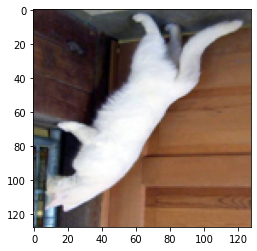

0


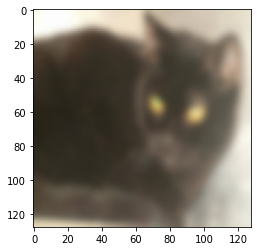

0


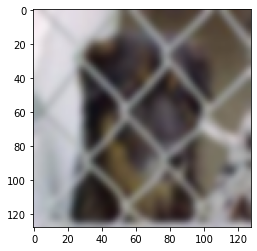

1


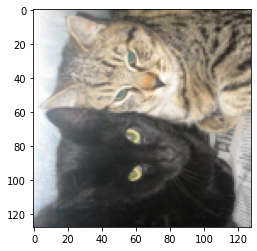

0


In [16]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

<h4> Training

In [17]:
model.fit(x_train,y_train,epochs=12,batch_size=64,callbacks = [cp_callback])

Epoch 1/12
1465/1465 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.6869
Epoch 00001: saving model to cp.ckpt
1465/1465 [==============================] - 149s 101ms/step - loss: 0.5822 - accuracy: 0.6869
Epoch 2/12
1465/1465 [==============================] - ETA: 0s - loss: 0.4556 - accuracy: 0.7863
Epoch 00002: saving model to cp.ckpt
1465/1465 [==============================] - 149s 102ms/step - loss: 0.4556 - accuracy: 0.7863
Epoch 3/12
1465/1465 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.8412
Epoch 00003: saving model to cp.ckpt
1465/1465 [==============================] - 156s 107ms/step - loss: 0.3536 - accuracy: 0.8412
Epoch 4/12
1465/1465 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.8734
Epoch 00004: saving model to cp.ckpt
1465/1465 [==============================] - 151s 103ms/step - loss: 0.2926 - accuracy: 0.8734
Epoch 5/12
1465/1465 [==============================] - ETA: 0s - loss: 0.2556 -

<h3> testing

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred

array([[0.9581138 ],
       [0.94618076],
       [0.31807256],
       ...,
       [0.20415674],
       [0.4507857 ],
       [0.03033114]], dtype=float32)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
sub=[]
for y1 in y_pred:
    if y1>0.5:
        sub.append(1)
    else:
        sub.append(0)
subm = np.array(sub)    

In [22]:
subm

array([1, 1, 0, ..., 0, 0, 0])

In [23]:
accuracy_score(y_test,subm)

0.92048

<h3>testing accuracy 92%